<a href="https://colab.research.google.com/github/clarentcelsia/PyML/blob/master/pca/doc/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA
Principal Component Analysis is an unsupervised learning (preprocessing task) carried out before applying any ML algorithm, based on orthogonal linear transformation. 

It detects the directions in which the vector formed data varies most. It first finds the direction of highest variance, and then proceeds to discover directions of highest variance that are orthogonal to those direction.

Generally used when having a muiltidimensional data that has many input attrs. In this case PCA allows you to identify the dimensions of greatest variance, to the dimensions of least variance. 

Basically, it refers to the fact that a higher number of attributes in a dataset adversely affects the accuracy and training time of the machine learning model. Principal Component Analysis (PCA) is a way to address this issue and is used for better data visualization and improving accuracy.

## Implement PCA with some random numbers
For basic, we gonna use some random numbers and implement it with pca.

In [19]:
import numpy as np

In [20]:
# create an array from random numbers
  # set randomstate to make sure the value is fixed. 
rand = np.random.RandomState(1) 

# return a sample (or samples) from the “standard normal” distribution.
a = rand.randn(5,5) 
print(a)

[[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
 [-2.3015387   1.74481176 -0.7612069   0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944]
 [-1.09989127 -0.17242821 -0.87785842  0.04221375  0.58281521]
 [-1.10061918  1.14472371  0.90159072  0.50249434  0.90085595]]


Standard Deviation Formula :

![](https://www.gstatic.com/education/formulas2/443397389/en/population_standard_deviation.svg)

In [30]:
# scaling data for data normalization before performing pca. 
# it's important not to skip this step because pca is to maximize the variance, 
# that happens when you projecting your original data onto direction.

# https://vitalflux.com/pca-explained-variance-concept-python-example/

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# z = (x - u) / s
 # u = mean of data
 # s = std dev of data
 # x = data
sc = StandardScaler(with_mean=False)
sc.fit(a)
a_std = sc.transform(a)
print('std score of a : \n', a_std)

# PCA
pca = PCA()
a_transformed = pca.fit_transform(a_std)
print('a_transformed : \n', a_transformed)

std of a : 
 [[ 1.04444159 -0.45591277 -0.82658795 -1.90605368  1.79927502]
 [-1.4798717   1.30032468 -1.19128759  0.56675063 -0.51846768]
 [ 0.94012417 -1.53532425 -0.50458241 -0.68224569  2.35722793]
 [-0.70722164 -0.12850249 -1.37384702  0.07498977  1.21173516]
 [-0.70768968  0.85310778  1.41098804  0.89264603  1.87297587]]
a_transformed : 
 [[-1.93164568e+00 -6.25065914e-01  8.81820614e-01  8.97098228e-02
   6.87375220e-17]
 [ 2.56934495e+00 -1.11335756e+00  1.79926778e-01 -2.03931965e-01
   6.87375220e-17]
 [-2.09781985e+00  2.25011474e-01 -6.09177622e-01 -2.49988752e-01
   6.87375220e-17]
 [ 3.81284809e-01 -7.06047738e-01 -6.47084719e-01  3.15526701e-01
   6.87375220e-17]
 [ 1.07883578e+00  2.21945974e+00  1.94514949e-01  4.86841936e-02
   6.87375220e-17]]


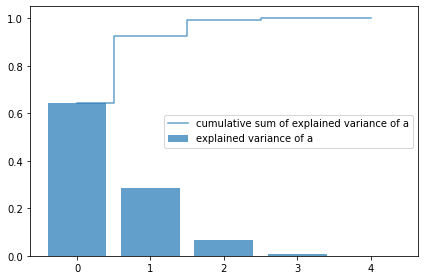

In [39]:
import matplotlib.pyplot as plt

# Explained Variance of A
 # statistical measure of how much variation in a dataset can be attributed to each of the principal components(eigenvectors).
 # it tells us how much of the total variance is “explained” by each component.
 # it allows us to rank the components in order of importance, the most important ones.
 # generally, the larger the variance, the more important that component is.

 # This technique is useful when reducing the dimensional of the larger data. 

# Remember, explained variance represents the information explained using DIFF PRINCIPAL COMPONENTS (EIGENVECTORS), that is 
# calculated as RATIO of related eigenvalue and sum of eigenvalues of all eigenvectors.

# Get the ratio of variance -> eigenvalue/total_eigh
exp_var_a = pca.explained_variance_ratio_ 
sum_exp_var_a = np.cumsum(exp_var_a)

data_x, data_y = range(0, len(exp_var_a)), exp_var_a
cum_eigh_x, cum_eigh_y = range(0, len(sum_exp_var_a)), sum_exp_var_a

plt.bar(data_x, data_y, alpha=0.7, label='explained variance of a', align='center')
plt.step(cum_eigh_x, cum_eigh_y, alpha=0.7, label='cumulative sum of explained variance of a', where='mid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

(100, 2)


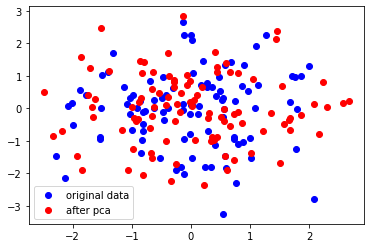

In [82]:
b =  rand.randn(100, 5)

# here we gonna fit and transform the new data
b_std = sc.fit_transform(b) # scaling

# Reduce feature dimension from 5 to 2
new_pca = PCA(n_components=2)
new_pca.fit(b_std)
b_transformed = new_pca.transform(b_std) # pca
print(b_transformed.shape)

# visualize
plt.scatter(b[:, 0], b[:, 1], c='b', label='original data')
plt.scatter(b_transformed[:, 0], b_transformed[:, 1], c='r', label='after pca')
plt.legend(loc='best')
plt.show()

(2,)
(2, 5)


Text(0.5, 1.0, 'transformed')

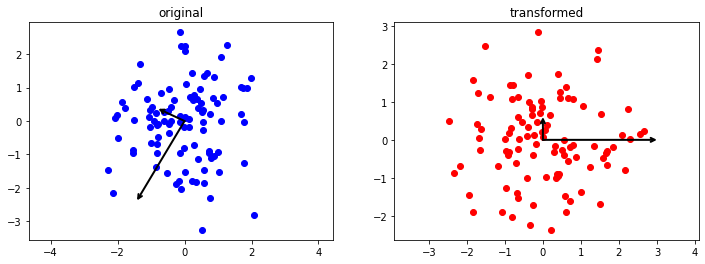

In [87]:
def arrows(v1, v2, axis):
  # define arrow attrs
  arrowprops = dict(
      arrowstyle='->',
      linewidth=2.,
      shrinkA=0,
      shrinkB=0)
  
  axis.annotate("", v2, v1, arrowprops=arrowprops)

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].axis('equal')
ax[0].scatter(b[:, 0], b[:, 1], c='b')

ax[1].axis('equal')
ax[1].scatter(b_transformed[:, 0], b_transformed[:, 1], c='r')

variances = new_pca.explained_variance_
print(variances.shape)
eigenvectors = new_pca.components_
print(eigenvectors.shape)

for length, vector in zip(variances, eigenvectors[:, :2]):
  # draw vector starts from axis (0,0)
  arrows([0,0], vector*length*3, ax[0]) 

# pca_transformed [1,0][0,1]
for length, vector in zip([1.0,0.2], [np.array([1.0,0.0]), np.array([0.0,1.0])]):
  arrows([0,0], vector*length*3, ax[1])

ax[0].set_title('original')
ax[1].set_title('transformed')

## Dataset

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
X_train = iris.data
X_train[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [6]:
# here pca learns some quantities from the data
pca.fit(X_train)

PCA(n_components=2)

In [7]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [8]:
pca.explained_variance_

array([4.22824171, 0.24267075])

## Plot

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:


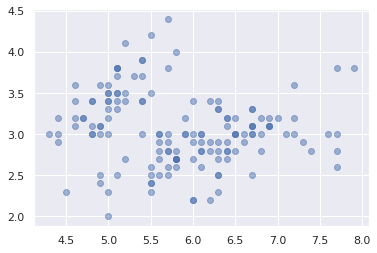

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# plot data
plt.scatter(X_train[:, 0], X_train[:, 1], c='b', alpha=0.5)

In [10]:
X_ = pca.transform(X_train)

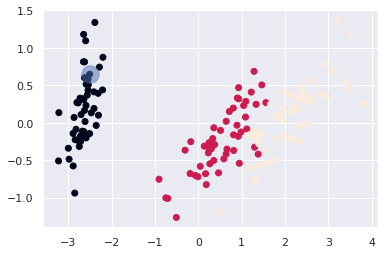

In [11]:
plt.scatter(X_[:, 0], X_[:, 1], c=iris.target)
plt.scatter([X_[10][0]], [X_[10][1]], s=[300], c=["b"], alpha=0.5)

In [12]:
X_[:5, :]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

The transformed data has been reduced. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

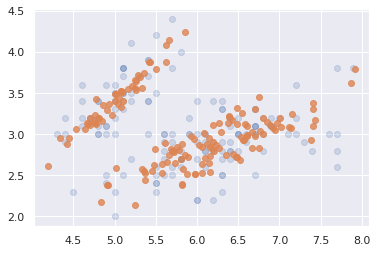

In [13]:
X_new = pca.inverse_transform(X_)
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');